In [1]:
import numpy as np
import pandas as pd
import os
import keras
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
from datetime import datetime
import time
from keras.layers import Input,Convolution2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from mtcnn.mtcnn import MTCNN
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
def time_capturing():
    date_time = datetime.now().isoformat(" ")
    start_time = datetime.now()
    date_time = date_time.split(" ")
    date = date_time[0]
    date = date.replace("-"," ")
    time = date_time[1]
    return [date,time,start_time]


In [3]:
x = time_capturing()
print(x)

['2019 11 25', '15:37:01.603067', datetime.datetime(2019, 11, 25, 15, 37, 1, 603067)]


In [4]:
datetime.now()

datetime.datetime(2019, 11, 25, 9, 46, 26, 474067)

In [27]:
def collecting_data():
    npy_file = []
    count = 0
    image_data = []
    labels = []
    img_labels = {}
    file_types = ["*.jpg","*.jpeg"]
    dataset_path = Path("FLask_Practice/static/Dataset/")
    for img_dir in dataset_path.glob("*"):
        
        dir_name = img_dir
        print(str(dir_name).split("\\")[-1])
        
        
        for file_type in file_types:
            for images in dir_name.glob(file_type):
                img_data = cv2.imread(str(images))
                img_data = cv2.resize(img_data,(100,100))
                img_data = np.asarray(img_data)
                image_data.append(img_data)
                npy_file.append(img_data)
                img_labels[str(dir_name).split("\\")[-1]] = count
                labels.append(img_labels[str(dir_name).split("\\")[-1]])
        np.save('Flask_practice/static/Dataset/'+str(dir_name).split("\\")[-1]+'.npy',npy_file)
        print('Flask_practice/static/Dataset/'+str(dir_name).split("\\")[-1]+'.npy : Saved Succefully...[/]')
        npy_file = []
        print("Data Loaded Succefully...[/]")
        count+=1
    
    print(img_labels)
    print(labels)
    print(count,"Images Loaded Succesfully..[/]")
    image_data = np.array(image_data)
    print(image_data.shape)
    image_data = np.reshape(image_data,(image_data.shape[0],-1))
    labels = np.array(labels)
    
    return image_data,labels,img_labels
    
    

In [28]:
stored_data,labels,img_labels = collecting_data()

Ravi
Flask_practice/static/Dataset/Ravi.npy : Saved Succefully...[/]
Data Loaded Succefully...[/]
Unknown
Flask_practice/static/Dataset/Unknown.npy : Saved Succefully...[/]
Data Loaded Succefully...[/]
Vikash
Flask_practice/static/Dataset/Vikash.npy : Saved Succefully...[/]
Data Loaded Succefully...[/]
{'Ravi': 0, 'Unknown': 1, 'Vikash': 2}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

(17962, 100, 100, 3)


In [26]:
def organisation_data():
    
    data = pd.read_csv("Flask_Practice/static/OrganisationData/Data.csv")
    information = []
    for col in data.columns:
        if col is not None:
            information.append(list(data[col].values))
    return information
    

In [56]:
def fetch_image(fetch_image_data,frames,arrival_time):

    global data
    global img_labels
    global knn
    label2name = {int(value):str(key) for key,value in img_labels.items()}
    person_names = data[1]
    person_labels = [1,0,3]
    status = 0
    vote = {'Known':[0,0],'Unknown':[0,0]}
    predicted_label = []
    for i in range(1,10):
        fetch_image_data[i] = np.reshape(fetch_image_data[i],(1,-1))
        print(fetch_image_data[i].shape)
#         print(knn.predict(fetch_image_data[i]))
        predicted_label.append(knn.predict(fetch_image_data[i]))
#         print(predicted_label)
        if(predicted_label[-1] in person_labels):
            vote['Known'][0]+=1
            vote['Known'][1]=i
        else:
            vote['Unknown'][0]+=1
            vote['Unknown'][1]=i
            
    predicted_label = np.array(predicted_label)
    label,count = np.unique(predicted_label,return_counts = True)
    count = list(count)
    predicted_label = label[count.index(max(count))]
    predicted_label = label2name[predicted_label]
    
    if(vote['Known'][0]>vote['Unknown'][0]):
        print("Found in Organisation Database.....[/]")
        location = "Flask_Practice/static/Known_Data/Recognized.csv"
        process_data(predicted_label,frames[vote['Known'][1]],arrival_time,location)
        print("Data Saved Successfully.....[/]\n")
   
    else:
        print("Match Not Found in Organisation Database.....[/]")
        location = "Flask_Practice/static/Known_Data/Recognized.csv"
        process_data('Unknown',frames[vote['Unknown'][1]],arrival_time,location)
        print("Data Saved Successfully.....[/]\n")
    

In [28]:
x = time_capturing()
print(x)

['2019 11 26', '15:58:00.623178', datetime.datetime(2019, 11, 26, 15, 58, 0, 623178)]


In [29]:
def process_data(predicted_label,frame,arrival_time,location):
    global data
#     print("data")
    df = None
    csv_data = {'Image Name':None,'Name':None,'DOB':None,'Email':None,'Contact':None,'ArrivalTime':None,'CompletionTime':None,'Date':None,'Start':None,'End':None}
    frame = cv2.resize(frame,(400,400))
    print(predicted_label)
    if( predicted_label != "Unknown"):
        index = data[1].index(predicted_label)
        csv_data['Name'] = predicted_label
        csv_data['DOB'] = data[2][index]
        csv_data['Email'] = data[3][index]
        csv_data['Contact'] = data[4][index]
    else:
        csv_data['Name'] = predicted_label
    
    tm = time_capturing()
    csv_data['Date'] = tm[0]
    csv_data['CompletionTime'] = tm[1]
    csv_data['ArrivalTime'] = arrival_time[1]
    csv_data['Start'] = arrival_time[2]
    csv_data['End'] = tm[2]
    
    
    
    file_name = str(csv_data['Date']).replace(" ","")+"-"+"-".join(str(csv_data['ArrivalTime']).split(":"))[:8]
    csv_data['Image Name'] = file_name
    check_file = None
    print(csv_data)
    print("/".join(str(location).split("/")[:-1]))
    cv2.imwrite("/".join(str(location).split("/")[:-1])+'/Images/'+file_name+'.jpg',frame)
    
    try:
        df = pd.read_csv(location,index_col=0)
        check_file = True
        
    except Exception as e:
        check_file = False
        df = pd.DataFrame(csv_data,index = [0])
        df.to_csv(location)

    if(check_file):
        csv_data = pd.DataFrame(csv_data,index = [0])
        df = pd.concat([df, csv_data])
        df.to_csv(location)
    

In [30]:
data = organisation_data()
data


[[0, 0, 0, 0, 0],
 ['Vikash', 'Anand', 'Ravi', 'Aman', 'Vishal'],
 ['1/1/1998', '1/1/1998', '1/1/1998', '1/1/1998', '01/02/1998'],
 ['vikash@gmail.com',
  'anand@gmail.com',
  'ravi@gmail.com',
  'aman@gmail.com',
  'vishal@gmail.com'],
 [8818868818, 8728904448, 8728904445, 7722972648, 7894561235]]

In [145]:
stored_data,labels,img_labels = collecting_data()

Ravi
Data Loaded Succefully...[/]
Unknown
Data Loaded Succefully...[/]
Vikash
Data Loaded Succefully...[/]
{'Ravi': 0, 'Unknown': 1, 'Vikash': 2}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

(17962, 100, 100, 3)


In [7]:
# Shuffling Data
import random

combined = list(zip(stored_data,labels))

random.shuffle(combined)

stored_data, labels = zip(*combined) 

X_train = np.asarray(stored_data)
Y_train = np.asarray(labels)

In [8]:
split = int(0.8*X_train.shape[0])
X_test = X_train[split:]
X_train = X_train[:split]

Y_test = Y_train[split:]
Y_train = Y_train[:split]

In [10]:
X_test.shape

(3593, 30000)

In [40]:
detector = MTCNN()

W1126 15:58:43.742603  5424 deprecation_wrapper.py:119] From c:\users\windows\appdata\local\programs\python\python36\lib\site-packages\mtcnn\mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1126 15:58:43.766602  5424 deprecation_wrapper.py:119] From c:\users\windows\appdata\local\programs\python\python36\lib\site-packages\mtcnn\mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1126 15:58:43.834578  5424 deprecation_wrapper.py:119] From c:\users\windows\appdata\local\programs\python\python36\lib\site-packages\mtcnn\network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1126 15:58:43.838582  5424 deprecation_wrapper.py:119] From c:\users\windows\appdata\local\programs\python\python36\lib\site-packages\mtcnn\layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1126 15:58:43.842577  5424 deprec

In [58]:
image_data = []
frames = []
offset = 5
arrival_time = []

capture = cv2.VideoCapture(0)

while True:
    ret,frame = capture.read()
    if(ret == False):
        continue
        
    frame = cv2.flip(frame,1)
    cv2.imshow("Original Frame",frame)
    result = detector.detect_faces(frame)
    original_frame = frame.copy()
    
    try:
    
        if(len(result)!=0):
            x,y,w,h = result[0]['box']
            
            cv2.imshow("frame",frame)
            keypoints = result[0]['keypoints']
            cv2.rectangle(frame,(x, y),(x+w-10, y+h-10),(0,155,255),2)
            cv2.circle(frame,(keypoints['left_eye']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['right_eye']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['nose']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['mouth_left']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['mouth_right']), 2, (0,155,255), 2)

            if(w>=50 and h>=50):
                img = frame[y-offset:y+h+offset,x-offset:x+w+offset]
                cv2.imshow("frame",img)
                img = cv2.resize(img,(100,100))
                img = np.asarray(img)
                image_data.append(img)
                frames.append(original_frame)
                
                if(len(image_data)==20):
                    fetch_image(image_data,frames,arrival_time)
                    image_data = []
                    arrival_time = []
                    frames = []
                    
                if(len(arrival_time)==0):
                    start = datetime.now()
                    arrival_time = time_capturing()
    
    except Exception:
        image_data = []
        arrival_time = []
        frames = []
    
    if(cv2.waitKey(1) & 0xFF == ord('q')):
        capture.release()
        cv2.destroyAllWindows()
        break
        

(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
Found in Organisation Database.....[/]
Ravi
{'Image Name': '20191126-16-06-14', 'Name': 'Ravi', 'DOB': '1/1/1998', 'Email': 'ravi@gmail.com', 'Contact': 8728904445, 'ArrivalTime': '16:06:14.427499', 'CompletionTime': '16:06:26.140812', 'Date': '2019 11 26', 'Start': datetime.datetime(2019, 11, 26, 16, 6, 14, 427499), 'End': datetime.datetime(2019, 11, 26, 16, 6, 26, 140812)}
Flask_Practice/static/Known_Data
Data Saved Successfully.....[/]

(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
(1, 30000)
Found in Organisation Database.....[/]
Ravi
{'Image Name': '20191126-16-06-26', 'Name': 'Ravi', 'DOB': '1/1/1998', 'Email': 'ravi@gmail.com', 'Contact': 8728904445, 'ArrivalTime': '16:06:26.216767', 'CompletionTime': '16:06:34.810861', 'Date': '2019 11 26', 'Start': datetime.datetime(2019, 11, 26, 16, 6, 26, 216767), 'End': datetime.datetime(2019, 11, 26, 

In [135]:
# accuracy_score(X_train,Y_train)

In [60]:
accuracy

[0.9873417721518988,
 0.9746835443037974,
 0.9620253164556962,
 0.9620253164556962,
 0.9493670886075949,
 0.9493670886075949,
 0.9493670886075949,
 0.9240506329113924,
 0.9493670886075949,
 0.9493670886075949]

In [11]:
test_data = np.reshape(X_test,(X_test.shape[0],100,100,3))

In [13]:
test_data.shape

(3593, 100, 100, 3)

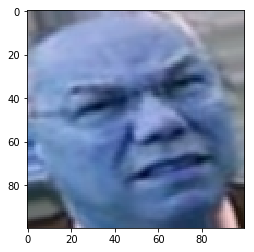

In [18]:
plt.imshow(test_data[1000])

{0: 'Ravi', 1: 'Unknown', 2: 'Vikash'}
Actual Label : Ravi
Predicted Label : Ravi


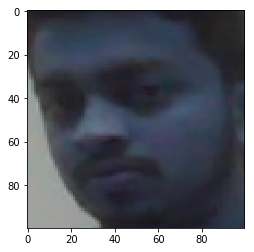

Actual Label : Vikash
Predicted Label : Vikash


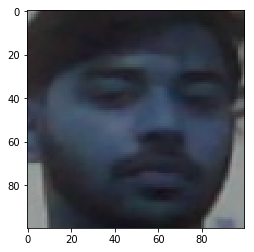

Actual Label : Unknown
Predicted Label : Unknown


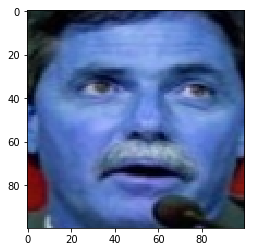

Actual Label : Unknown
Predicted Label : Unknown


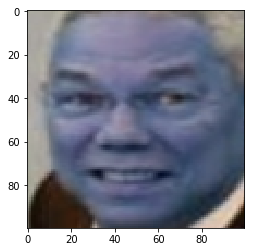

Actual Label : Ravi
Predicted Label : Ravi


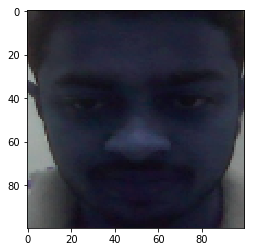

Actual Label : Unknown
Predicted Label : Unknown


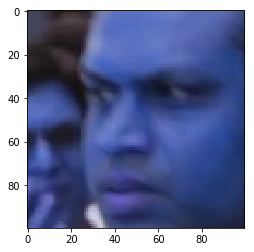

Actual Label : Unknown
Predicted Label : Unknown


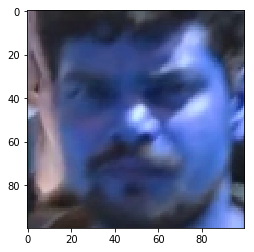

Actual Label : Vikash
Predicted Label : Vikash


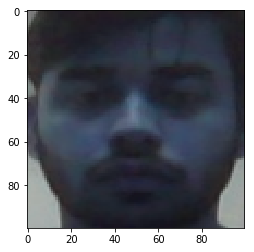

Actual Label : Unknown
Predicted Label : Unknown


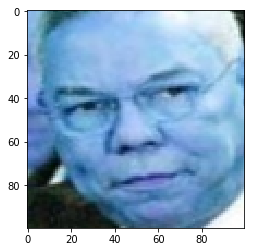

Actual Label : Ravi
Predicted Label : Ravi


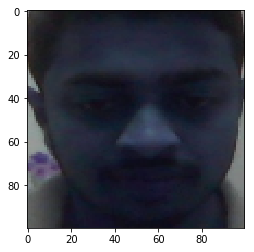

In [144]:
print(label2name)
import random 
index = [random.randint(0,X_test.shape[0]) for i in range(10)]
for i in index:
    print('Actual Label :',label2name[Y_test[i]])
    plt.imshow(test_data[i])
    d = np.reshape(X_test[i],(1,-1))
    pred = knn.predict(d)
    print('Predicted Label :',label2name[pred[0]])
    plt.show()
    

In [31]:
# vikash = np.load('Ravi.npy')
# # print(len(vikash))
# print(vikash)
dataset_path = Path("FLask_Practice/static/Dataset/")

In [35]:
image_data = {}
labels = {}
class_id = 0
for file in dataset_path.glob("*.npy"):
    target = str(file).split("\\")[-1]
    image_data[target.split(".")[0]] = np.load(file)
    labels[target.split(".")[0]] = class_id * np.ones((image_data[target.split(".")[0]].shape[0],))
    class_id +=1

In [41]:
image_data.keys()

dict_keys(['Ravi', 'Unknown', 'Vikash'])

In [42]:
image_data['Vikash'].shape
face_data = []
face_data.append(image_data['Ravi'])
face_data.append(image_data['Unknown'])
face_data.append(image_data['Vikash'])

face_labels = []
face_labels.append(labels['Ravi'])
face_labels.append(labels['Unknown'])
face_labels.append(labels['Vikash'])

In [44]:
print(len(face_data))
print(len(face_labels))

3
3


In [45]:
face_dataset = np.concatenate(face_data,axis = 0)
face_label = np.concatenate(face_labels,axis= 0).reshape((-1,1))

In [61]:
face_dataset = np.reshape(face_dataset,(face_dataset.shape[0],-1))
print(face_dataset.shape)

(17962, 30000)


In [62]:
# Shuffling Data
import random

combined = list(zip(face_dataset,face_label))

random.shuffle(combined)

stored_data, labels = zip(*combined) 

X_train = np.asarray(face_dataset)
Y_train = np.asarray(face_label)

In [63]:
# face_label
split = int(0.8*X_train.shape[0])
X_test = X_train[split:]
X_train = X_train[:split]

Y_test = Y_train[split:]
Y_train = Y_train[:split]

In [65]:
X_train.shape

(14369, 30000)

In [105]:
accuracy = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    accuracy.append(accuracy_score(pred,Y_test))

In [66]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [67]:
import pickle

In [68]:
knnPickle = open('knnpickle_file', 'wb')

In [70]:
pickle.dump(knn, knnPickle)

In [ ]:
pred = knn.predict(X_test)

In [126]:
print(accuracy_score(pred,Y_test))

0.9493670886075949


In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
params = {
    'n_neighbors':list(range(1,15)),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

In [111]:
gs = GridSearchCV(knn,params)

In [113]:
# gs.fit(X_train,Y_train)

In [20]:
accuracy = []

In [25]:
accuracy.append(0.99901)

In [26]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

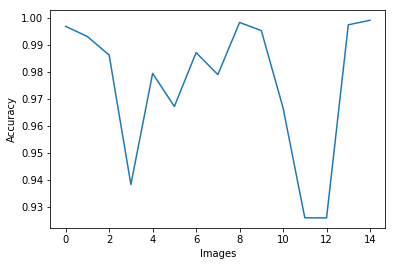

In [30]:
plt.plot(accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Images")
plt.savefig("Accuracy.png")
plt.show

In [28]:
plt.savefig("Accuracy.png")

<Figure size 432x288 with 0 Axes>

In [35]:
location = "Known_Data/Recognized.csv"

In [21]:
df = pd.read_csv("Flask_Practice/static/Known_Data/Recognized.csv")

In [75]:
capture.release()
cv2.destroyAllWindows()

In [43]:
label2name = {int(value):str(key) for key,value in img_labels.items()}

In [44]:
label2name

{0: 'Ravi', 1: 'Unknown', 2: 'Vikash'}

In [54]:
capture = cv2.VideoCapture(0)
print(img_labels)
offset = 5
while True:
    ret,frame = capture.read()
    if(ret == False):
        continue
        
    frame = cv2.flip(frame,1)
    cv2.imshow("Original Frame",frame)
    result = detector.detect_faces(frame)
    if(len(result)!=0):
        x,y,w,h = result[0]['box']
        keypoints = result[0]['keypoints']
        cv2.rectangle(frame,(x, y),(x+w-10, y+h-10),(0,155,255),2)
       
        face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section = cv2.resize(face_section,(100,100))
        pred = knn.predict(np.reshape(face_section,(1,-1)))
        print(label2name[pred[0]])
        cv2.putText(frame, label2name[pred[0]], (x,y), cv2.FONT_HERSHEY_SIMPLEX ,1, (0, 0, 255), 2, cv2.LINE_AA) 
        cv2.imshow('Frame',frame)

    if(cv2.waitKey(1) & 0xFF == ord('q')):
        capture.release()
        cv2.destroyAllWindows()
        break
    

{'Ravi': 0, 'Unknown': 1, 'Vikash': 2}
(1, 30000)
Ravi
(1, 30000)
Unknown
(1, 30000)
Unknown
(1, 30000)
Unknown
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Unknown
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Unknown
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Unknown
(1, 30000)
Unknown
(1, 30000)
Unknown
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi
(1, 30000)
Ravi


error: OpenCV(3.4.3) D:\Build\OpenCV\opencv-3.4.3\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [55]:
capture.release()
cv2.destroyAllWindows()

In [48]:
count = 1
location.split("/")[0]+"/"+"%s.npy"%(count)

'Known_Data/1.npy'

In [66]:
capture.release()
cv2.destroyAllWindows()

In [57]:
def visualizing_image(location):
    
    path = Path(location+"/")
    
    for img_file in path.glob("*.npy"):
        file = np.load(str(img_file))
        image = np.reshape(file,(400,400,3))
        plt.imshow(image)
        plt.show()
    

TypeError: Image data cannot be converted to float

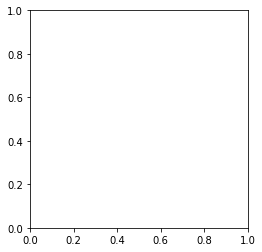

In [34]:
plt.imshow("Known_Data/Images/0.jpg")

In [16]:
capture = cv2.VideoCapture(0)

In [17]:
ret,frame = capture.read()

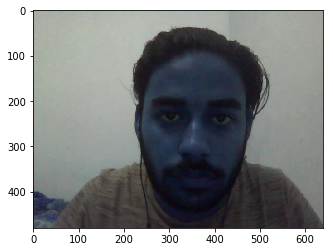

In [19]:
plt.imshow(frame)

In [20]:
cv2.imwrite("Known_Data/Images/1.jpg",frame)

True

In [18]:
capture.release()
cv2.destroyAllWindows()

Enter Location of Directory : Known_Data


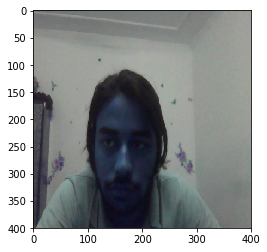

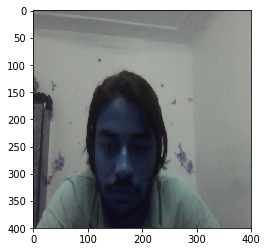

In [58]:
location = input("Enter Location of Directory : ")
visualizing_image(location)

In [60]:
def ConvertImages(location):
    
    path = Path(location+"/")
    dest_path = location+"/Images/"
    for img_file in path.glob("*.npy"):
        file = np.load(str(img_file))
        image = np.reshape(file,(400,400,3))
        cv2.imwrite(str(dest_path)+str(img_file).split("\\")[-1][:-4]+".jpg",image)
        print("Converted Successfuly.....[/]")

In [22]:
location = input("Enter Location of Directory : ")
ConvertImages(location)

Converted Successfuly.....[/]
Converted Successfuly.....[/]
Converted Successfuly.....[/]
Converted Successfuly.....[/]
Converted Successfuly.....[/]


In [66]:
d = {'c':['22 13 18','22 13 18','22 13 18']}

In [67]:
d

{'c': ['22 13 18', '22 13 18', '22 13 18']}

In [68]:
a = [str(i).replace(" ","/") for i in d['c']]

In [69]:
a

['22/13/18', '22/13/18', '22/13/18']